![image alt ><](./img/streaming.jpg)

<h1 style="font-family:verdana;">Movie Streaming Analysis</h1>

<img src="./img/imdb_logo.jpeg" width="50" height="75" style="float:left">
<h1 style="font-size:100%; ">This Notebook projects plots and visuals to determine the rankings of the top rated movies on IMDB platform.
it also provides information on genres and trends of the most voted movies by viewers</h1>





# Project Questions
>What we want to figure out with this data is to sift through over 85,854 movie titles  by analyzing in depth the various relationships such as genre & audience and poplarity  in order to calculate the rank of movies and TV shows in the lists of the most voted films and programs. What we want to figure out with this data is to sift through over 85,854 movie titles  by analyzing in depth the various relationships such as genre & audience and poplarity  in order to calculate the rank of movies and TV shows in the lists of the most voted films and programs. 





## Project Requirment
>technical analysis regarding Microsoft business case to start a new movie studio
data analytics are used by movie and television studios to give each production its best chance at success


## Data Resources & Collection
>the data used in this notebook mainly based on 'IMDB'  and come from over 85,000 Movie Database  hosted on kaggle.com and compiled by user stefanoleone992. The IMDB ratings are the average score, which can range from 1 to 10, submitted by users of IMDB.com.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
%run PandasDataframeFunctions.ipynb
pdf=PandasDataframeFunctions
#%run 'jupyter_display.ipynb'
imdb_movie=pd.read_csv('https://github.com/akladyous/imdb_movie_analysis/raw/main/data/IMDb%20movies.csv', low_memory=False)
imdb_ratings=pd.read_csv('https://github.com/akladyous/imdb_movie_analysis/raw/main/data/IMDb%20ratings.csv')

## Cleaning Data
<img src="./img/arrow_down.png" width="25" height="25" style="float:left">


In [21]:
imdb = pd.merge(imdb_movie,imdb_ratings, left_on='imdb_title_id', right_on='imdb_title_id')
pdf.dropcol(imdb,60)
imdb.drop(imdb[imdb['year'].str.contains('[A-Za-z]')].index, inplace=True)
imdb['year']=imdb['year'].astype(np.dtype('int32'))
if imdb['votes'].equals(imdb['total_votes']): imdb.drop('votes', axis=1, inplace=True)
imdb.drop_duplicates(subset=['title'], keep='last', inplace=True)
imdb.dropna(subset=['country'], inplace=True)

## Data Analysis
<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

In [22]:
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,13.0,5.0,5.7,484,5.8,6.0,33,15,48,80,123,77,36,20,18,34,5.6,35.0,5.6,177.0,5.8,168.0,5.7,354.0,5.6,32.0,5.7,159.0,5.8,151.0,5.8,31.0,6.3,3.0,5.1,13.0,6.5,15.0,5.5,67.0,5.9,173.0,5.6,181.0


In [23]:
imdb.describe()

,year,duration,avg_vote,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
count,82030.000000,82030.000000,82030.000000,74613.000000,70656.000000,82030.000000,8.203000e+04,82030.000000,82030.000000,8.203000e+04,82030.000000,82030.00000,82030.000000,82030.000000,82030.000000,82030.000000,82030.000000,82030.000000,82030.000000,81354.000000,81354.000000,82020.000000,82020.000000,81953.000000,81953.000000,82029.000000,8.202900e+04,80621.000000,80621.000000,82018.000000,82018.000000,81932.000000,81932.000000,81950.000000,81950.000000,75795.000000,75795.000000,81117.000000,81117.000000,79312.000000,79312.000000,81368.000000,81368.000000,81823.000000,81823.000000,82029.000000,82029.000000
mean,1993.961331,100.281458,5.897329,46.162264,27.596538,5.897329,9.566483e+03,6.225338,6.268341,1.224321e+03,1204.748433,2055.99043,2122.118749,1364.616275,706.194587,343.119176,193.942350,127.770779,223.660283,6.010290,1800.767018,5.861750,4081.722202,5.675425,1260.388149,5.815497,6.073149e+03,5.945044,1360.410761,5.816368,3347.564096,5.627425,1050.910316,6.038848,1377.315863,6.320028,450.420054,6.071727,690.203151,6.020655,196.084703,5.150512,75.442754,5.923511,1650.740574,5.748455,4365.474357
std,23.926276,22.326984,1.233689,180.794907,58.840132,1.233689,5.409151e+04,1.154640,1.480976,1.262326e+04,11803.879281,13926.90441,10808.443191,6039.051217,2960.693286,1430.609680,823.410893,557.691402,1187.996901,1.438355,11938.292096,1.278242,22269.660687,1.248550,5396.132528,1.246934,3.395824e+04,1.462705,9226.329399,1.288262,18498.326217,1.262045,4500.412677,1.344761,7745.479117,1.737566,2862.650820,1.452303,3761.926920,1.543882,848.406476,1.292271,123.983136,1.308846,8517.406845,1.284716,23447.287988
min,1894.000000,41.000000,1.000000,1.000000,1.000000,1.000000,9.900000e+01,1.000000,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1980.000000,88.000000,5.200000,3.000000,3.000000,5.200000,2.040000e+02,5.600000,6.000000,2.100000e+01,8.000000,18.00000,28.000000,30.000000,22.000000,12.000000,7.000000,5.000000,10.000000,5.300000,13.000000,5.100000,69.000000,5.000000,53.000000,5.100000,1.310000e+02,5.100000,10.000000,5.100000,56.000000,4.900000,44.000000,5.300000,22.000000,5.500000,4.000000,5.300000,10.000000,5.200000,6.000000,4.400000,11.000000,5.200000,24.000000,5.000000,95.000000
50%,2003.000000,96.000000,6.100000,9.000000,8.000000,6.100000,4.820000e+02,6.400000,6.000000,5.100000e+01,24.000000,49.00000,77.000000,76.000000,52.000000,30.000000,19.000000,14.000000,25.000000,6.200000,43.000000,6.100000,171.000000,5.900000,121.000000,6.000000,3.070000e+02,6.200000,31.000000,6.000000,139.000000,5.900000,103.000000,6.300000,58.000000,6.500000,11.000000,6.300000,26.000000,6.200000,16.000000,5.300000,29.000000,6.100000,79.000000,6.000000,225.000000
75%,2013.000000,108.000000,6.800000,26.000000,23.000000,6.800000,1.755000e+03,7.000000,7.000000,1.910000e+02,111.000000,232.00000,340.000000,288.750000,178.000000,99.750000,63.000000,46.000000,82.000

## Duration Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

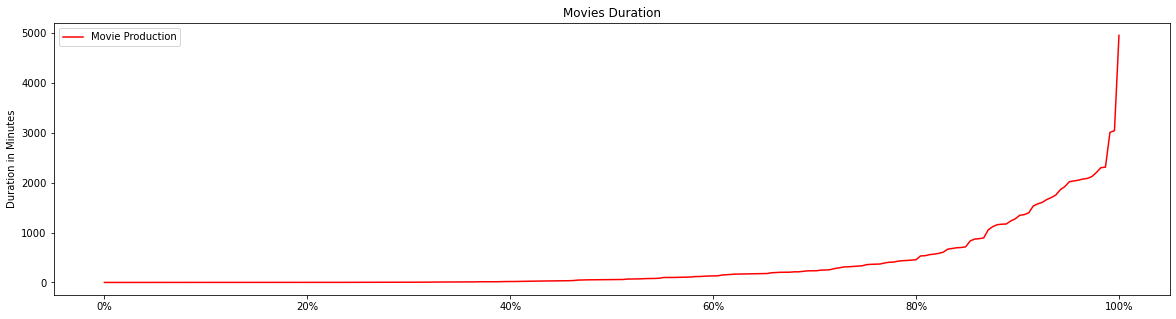

In [24]:
#imdb analysis by duration


unique_duration_dict      = dict()
unique_duration_key       = list()
unique_duration_value     = list()
unique_duration_all       = imdb['duration'].unique().tolist()
unique_duration_condition = sorted([x for x in unique_duration_all if x>= 45 and x <= 300])
duration_filter1          = (imdb['duration'] >= 45) & (imdb['duration'] <= 300) 

for duration in unique_duration_condition:
    unique_duration_dict[duration]= ((imdb['duration']==duration) & (duration_filter1)).sum()    

unique_duration_key       = [k for k,v in sorted(unique_duration_dict.items(), key=lambda d:d[1], reverse=False)]
unique_duration_value     = [v for k,v in sorted(unique_duration_dict.items(), key=lambda d: d[1], reverse=False)]
 

x = np.linspace(0,100,len(unique_duration_value))
fmt = '%.0f%%'
fig = plt.figure(figsize=[20,5])
fig.tight_layout()
ax1=fig.add_subplot()
ax1.set_ylabel('Duration in Minutes')
ax1.set_title("Movies Duration")
xticks = mtick.FormatStrFormatter(fmt)
ax1.xaxis.set_major_formatter(xticks)
ax1.plot(x,unique_duration_value , color='r', label='Movie Production')

ax1.legend(loc='upper left')
plt.show()

## Genres Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

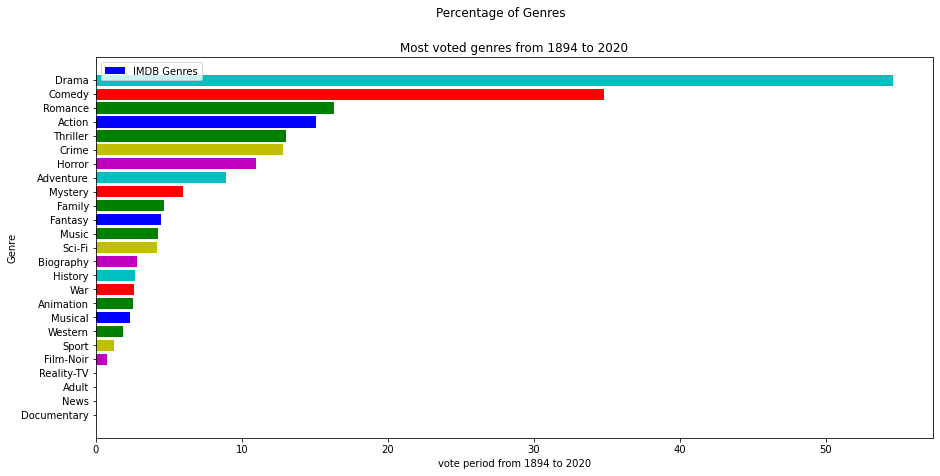

<Figure size 432x288 with 0 Axes>

In [25]:
#imdb analysis by genres

unique_genres=set()
genres=dict()
for line in imdb['genre']:
    unique_genres.update(item for item in {*line.split(', ')})

for item in unique_genres:
    genres[item]=imdb['genre'].str.contains(item).sum() #
genre_list_reversed = [(k) for k,v in sorted(genres.items(), key=lambda item : item[1], reverse=False)]
genre_voted_percent = [(v/imdb['genre'].size*100) for k,v in sorted(genres.items(), key=lambda item : item[1], reverse=False) ]    

fig = plt.figure(figsize=[15,7])
fig.suptitle('Percentage of Genres', fontsize=12)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
xlabel = range(imdb['year'].min(), imdb['year'].max())
ax1=fig.add_subplot(1,1,1)
ax1.barh(genre_list_reversed,genre_voted_percent , color=colors, label='IMDB Genres')
ax1.set_xlabel(f"vote period from {imdb['year'].min()} to {imdb['year'].max()}")
ax1.set_ylabel('Genre')
ax1.set_title(f"Most voted genres from {imdb['year'].min()} to {imdb['year'].max()}")

ax1.legend(loc='upper left')
plt.show()
plt.savefig('genres')

## Production Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

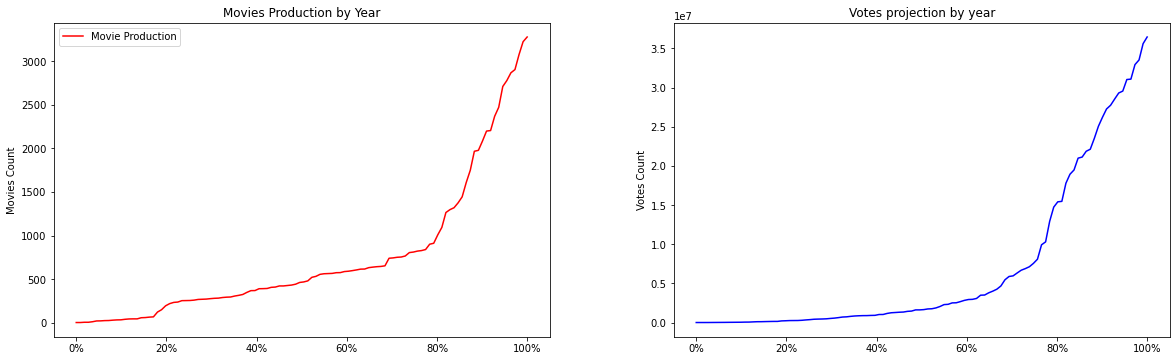

In [15]:

unique_years = np.sort(imdb['year'].unique())
unique_movies_count_by_year = dict()
unique_vote_count_by_year = dict()

for year in unique_years:
    unique_movies_count_by_year[year]= (imdb['year']==year).sum()
    unique_vote_count_by_year[year] =  imdb.loc[imdb['year'] == year, 'total_votes'].sum()

movie_list_reversed = [(v) for k,v in sorted(unique_movies_count_by_year.items(), key=lambda item : item[1], reverse=False)]
vote_list_reversed  = [(v) for k,v in sorted(unique_vote_count_by_year.items(), key=lambda item : item[1], reverse=False)]

fig = plt.figure(figsize=[20,13])
fig.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
fig.subplots_adjust(wspace=0.25, hspace=0.25)

fmt = '%.0f%%'
xticks = mtick.FormatStrFormatter(fmt)

x1 = np.linspace(0,100,len(unique_years))
ax1=fig.add_subplot(2,2,1)
ax1.set_ylabel('Movies Count')
ax1.set_title("Movies Production by Year")
ax1.plot(x1,movie_list_reversed , color='r', label='Movie Production')
ax1.xaxis.set_major_formatter(xticks)

x2 = np.linspace(0,100,len(unique_years))
ax2=fig.add_subplot(2,2,2)
ax2.set_ylabel('Votes Count')
ax2.set_title("Votes projection by year")
ax2.plot(x2,vote_list_reversed , color='b', label='Total Votes')
ax2.xaxis.set_major_formatter(xticks)

ax1.legend(loc='upper left')
plt.show()

## Country Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

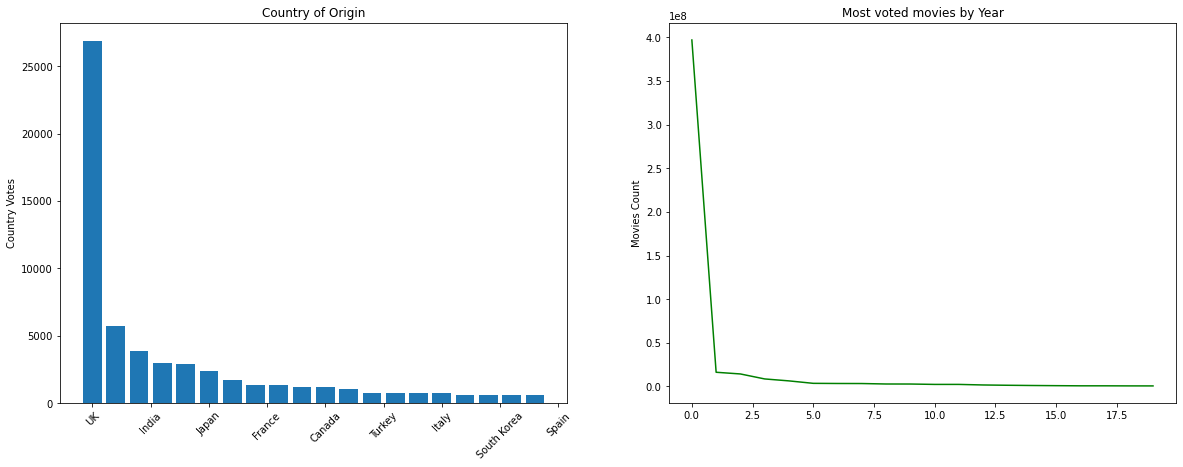

In [74]:
# imdb analysis by country 
unique_countries = set()
votes_by_country = dict()
country_count = dict()


for line in imdb['country']:
    unique_countries.update(item for item in {*line.split(', ')})

for country in unique_countries:
    votes_by_country[country] = imdb.loc[imdb['country'] == country, 'total_votes'].sum()
    country_count[country]    = (imdb['country']==country).sum()
    #{k:v for k,v in country_count.items() if k=="USA"}

votes_by_country_keys   = [(k) for k, v in sorted(votes_by_country.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
votes_by_country_values = [(v) for k, v in sorted(votes_by_country.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]


country_count_key       = [(k) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
country_count_values    = [(v) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0][:20]
#country_count_percent   = [(v/imdb['country'].size*100) for k,v in sorted(country_count.items(), key=lambda item : item[1], reverse=True) if v> 0]

country_x_axis          = range(len([(v) for k,v in country_count.items() if v >0]))[:20]

fig = plt.figure(figsize=[20,7])
ax1=fig.add_subplot(121)
ax1.set_ylabel('Country Votes')
ax1.set_title("Country of Origin")
ax1.xaxis.set_tick_params(rotation=45)
ax1.set_xticklabels(votes_by_country_keys)
ax1.bar(country_x_axis, country_count_values)
ax2=fig.add_subplot(122)
ax2.set_ylabel('Movies Count')
ax2.set_title("Most voted movies by Year")
ax2.plot(country_x_axis, votes_by_country_values , color='g', label='Country Counts')
plt.show()

## weighted rating formula Analysis

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

IMDB’s weighted rating formula as metric. Mathematically, it can be represented as follows

<img src="./img/Weighted_Rating_formula.png" width="250" height="200" style="float:left">

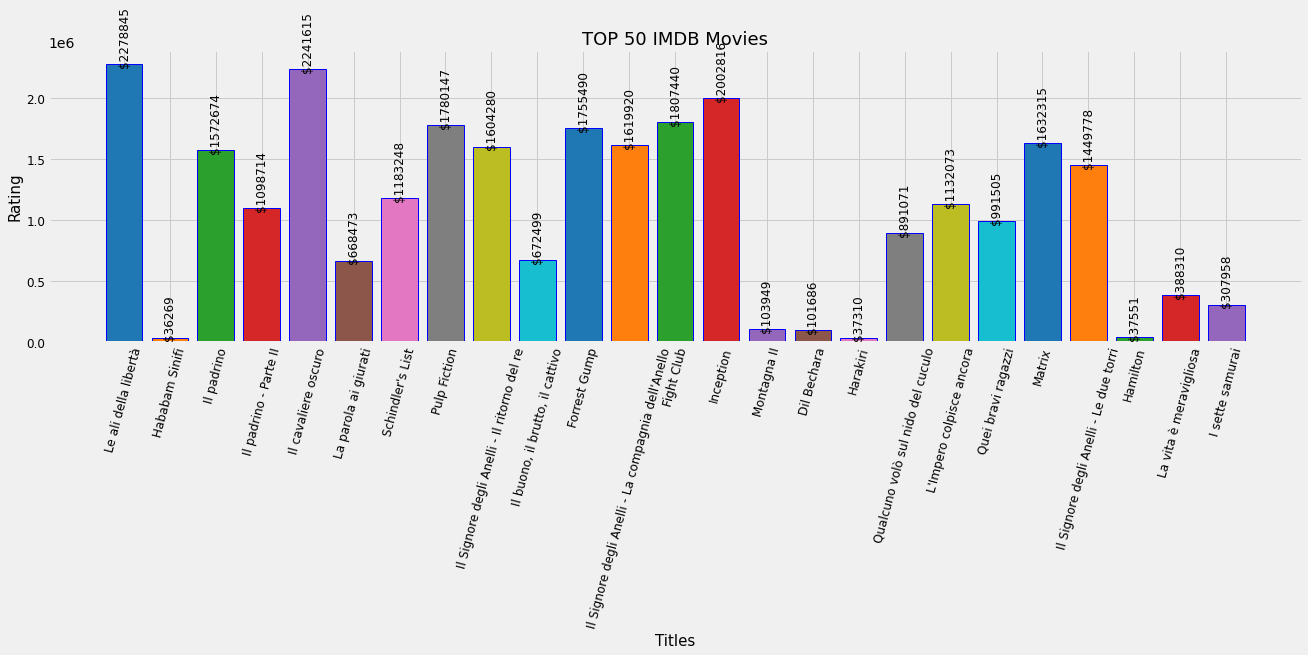

In [31]:
imdb_top_movie             = dict()
imdb_top_movie_v_title     = list()
imdb_top_movie_v_rating    = list()

imdb_top_movie=pdf.weighted_rating(imdb,'title','duration','avg_vote','total_votes',25)
imdb_top_movie_v_title, imdb_top_movie_v_rating = zip(*imdb_top_movie.items())

imdb_top_movie_votes       = {k:0 for k,v in imdb_top_movie.items()}
imdb_top_movie_votes_title = list()
imdb_top_movie_votes_value = list()
for movie_vote in imdb_top_movie_votes:
        imdb_top_movie_votes[movie_vote] = imdb.loc[imdb['title'] == movie_vote, 'total_votes'].values[0]
imdb_top_movie_votes_title, imdb_top_movie_votes_value = zip(*imdb_top_movie_votes.items())

colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
top250_x = list(range(len(imdb_top_movie_v_rating)))
plt.style.use(("fivethirtyeight"))
plt.figure(figsize = (20,5)) # width and height of figure is defined in inches
plt.title("TOP 50 IMDB Movies", fontsize=18)
plt.bar(imdb_top_movie_v_title, imdb_top_movie_votes_value, color=colors ,edgecolor='blue', linewidth = 1)
plt.xlabel("Titles",fontsize=15)  # x axis shows the States
plt.ylabel("Rating",fontsize=15)  # y axis shows the Revenue
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)

for k,v in imdb_top_movie_votes.items(): #To show the exact revenue generated on the figure
    plt.text(k,v,'$'+ str(round(v,2)), fontsize=12,rotation=90,color='k', horizontalalignment='center');


## Conclusion

<img src="./img/arrow_down.png" width="25" height="25" style="float:left">

Drama, Comedy, Romance, and Action are the most popular genres in general, and make
up about 50% of all movies made from 1984-2020.
Since 1984, Drama has been the most popular genre per decade except for the 80's when Comedy was more poular.
Production lengths has soared from 1984 to 2020.
Revenue and profitability have a weak positive correlation.